In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("Clustering Clean Ads_Data-2.xlsx",sheet_name=0)

<font color = "blue">
<font size = 5>
Part 1 - Clustering: Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

In [3]:
df.shape

(23066, 19)

### There are 23066 Rows and 19 columns

In [4]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [5]:
df.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

### The data has 13 numerical variables and 6 Object datatype variables

In [7]:
data = df.drop("Timestamp",axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   InventoryType          23066 non-null  object 
 1   Ad - Length            23066 non-null  int64  
 2   Ad- Width              23066 non-null  int64  
 3   Ad Size                23066 non-null  int64  
 4   Ad Type                23066 non-null  object 
 5   Platform               23066 non-null  object 
 6   Device Type            23066 non-null  object 
 7   Format                 23066 non-null  object 
 8   Available_Impressions  23066 non-null  int64  
 9   Matched_Queries        23066 non-null  int64  
 10  Impressions            23066 non-null  int64  
 11  Clicks                 23066 non-null  int64  
 12  Spend                  23066 non-null  float64
 13  Fee                    23066 non-null  float64
 14  Revenue                23066 non-null  float64
 15  CT

In [9]:
data.isnull().sum()

InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


<font color = "blue">
<font size = 5>
Part 1 - Clustering: Treat missing values in CPC, CTR and CPM using the formula given.

In [12]:
def calculate_CTR(x):
    Clicks=data["Clicks"]
    Impressions=data["Impressions"]
    ctr = (Clicks/Impressions)*100
    return ctr

In [13]:
def calculate_CPM(x):
    Spend=data["Spend"]
    Impressions=data["Impressions"]
    cpm = (Spend/Impressions)*1000
    return cpm

In [14]:
def calculate_CPC(x):
    Spend=data["Spend"]
    Clicks=data["Clicks"]
    cpc = (Spend/Clicks)
    return cpc

In [15]:
data['CTR']= data[['CTR']].apply(lambda x: calculate_CTR(x))
data['CPM']= data[['CPM']].apply(lambda x: calculate_CPM(x))
data['CPC']= data[['CPC']].apply(lambda x: calculate_CPC(x))

In [16]:
data.isnull().sum()

InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

### Summary after Cleaning NA's

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.000000,120.000000,300.000000,7.200000e+02,7.280000e+02
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.000000,250.000000,300.000000,6.000000e+02,6.000000e+02
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.000000,72000.000000,72000.000000,8.400000e+04,2.160000e+05
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.000000,33672.250000,483771.000000,2.527712e+06,2.759286e+07
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.000000,18282.500000,258087.500000,1.180700e+06,1.470202e+07
Impressions,23066.0,1.241520e+06,2.429400e+06,1.000000,7990.500000,225290.000000,1.112428e+06,1.419477e+07
Clicks,23066.0,1.067852e+04,1.735341e+04,1.000000,710.000000,4425.000000,1.279375e+04,1.430490e+05
Spend,23066.0,2.706626e+03,4.067927e+03,0.000000,85.180000,1425.125000,3.121400e+03,2.693187e+04
Fee,23066.0,3.351231e-01,3.196322e-02,0.210000,0.330000,0.350000,3.500000e-01,3.500000e-01
Revenue,23066.0,1.924252e+03,3.105238e+03,0.000000,55.365375,926.335000,2.091338e+03,2.127618e+04


## EDA

In [18]:
cats = list(data.dtypes[data.dtypes == 'object'].index)
cats

['InventoryType', 'Ad Type', 'Platform', 'Device Type', 'Format']

In [19]:
for i in cats:
    print(i.upper(),':')
    print()
    print(data[i].value_counts())
    print()

INVENTORYTYPE :

Format4    7165
Format5    4249
Format1    3814
Format3    3540
Format6    1850
Format2    1789
Format7     659
Name: InventoryType, dtype: int64

AD TYPE :

Inter224    1658
Inter217    1655
Inter223    1654
Inter219    1650
Inter221    1650
Inter222    1649
Inter229    1648
Inter227    1647
Inter218    1645
inter230    1644
Inter220    1644
Inter225    1643
Inter226    1640
Inter228    1639
Name: Ad Type, dtype: int64

PLATFORM :

Video    9873
Web      8251
App      4942
Name: Platform, dtype: int64

DEVICE TYPE :

Mobile     14806
Desktop     8260
Name: Device Type, dtype: int64

FORMAT :

Video      11552
Display    11514
Name: Format, dtype: int64



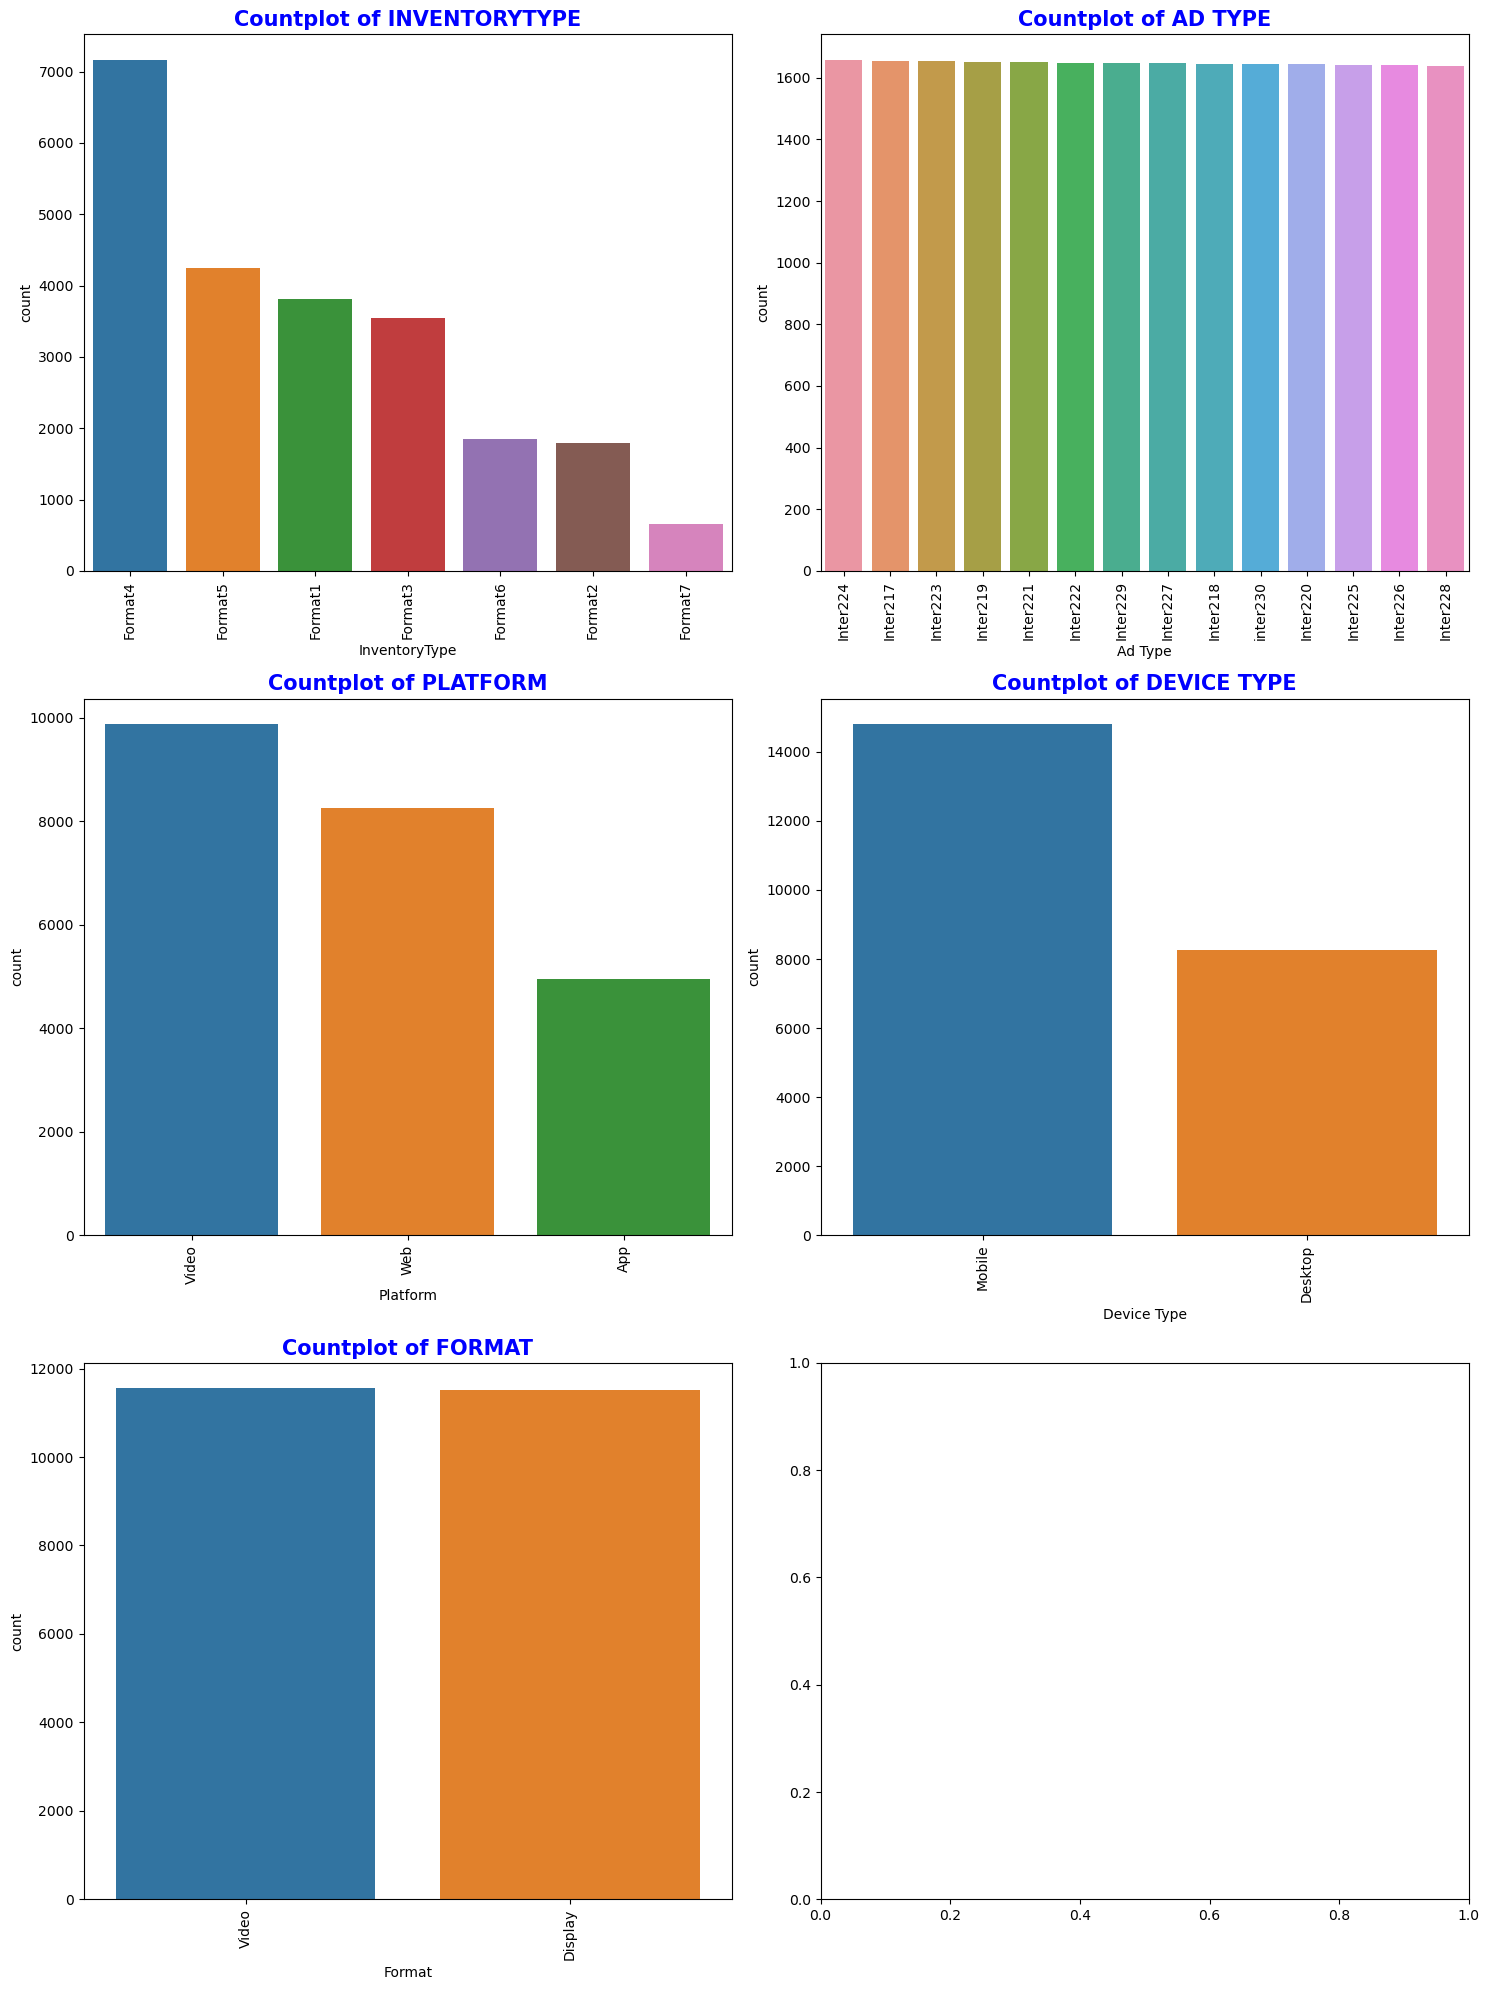

In [20]:
fig,axes = plt.subplots(3,2,figsize=(15,20))
for i,ax in zip(cats,axes.flatten()):
    sns.countplot(x = i,data = data,ax=ax, order = data[i].value_counts().index)
    ax.set_title(f"Countplot of {i.upper()}",fontsize=15,weight='bold',color="Blue")
    ax.set_xticklabels(labels = data[i].value_counts().index,rotation=90)
    plt.tight_layout()

In [21]:
num = list(data.dtypes[data.dtypes != 'object'].index)
num

['Ad - Length',
 'Ad- Width',
 'Ad Size',
 'Available_Impressions',
 'Matched_Queries',
 'Impressions',
 'Clicks',
 'Spend',
 'Fee',
 'Revenue',
 'CTR',
 'CPM',
 'CPC']

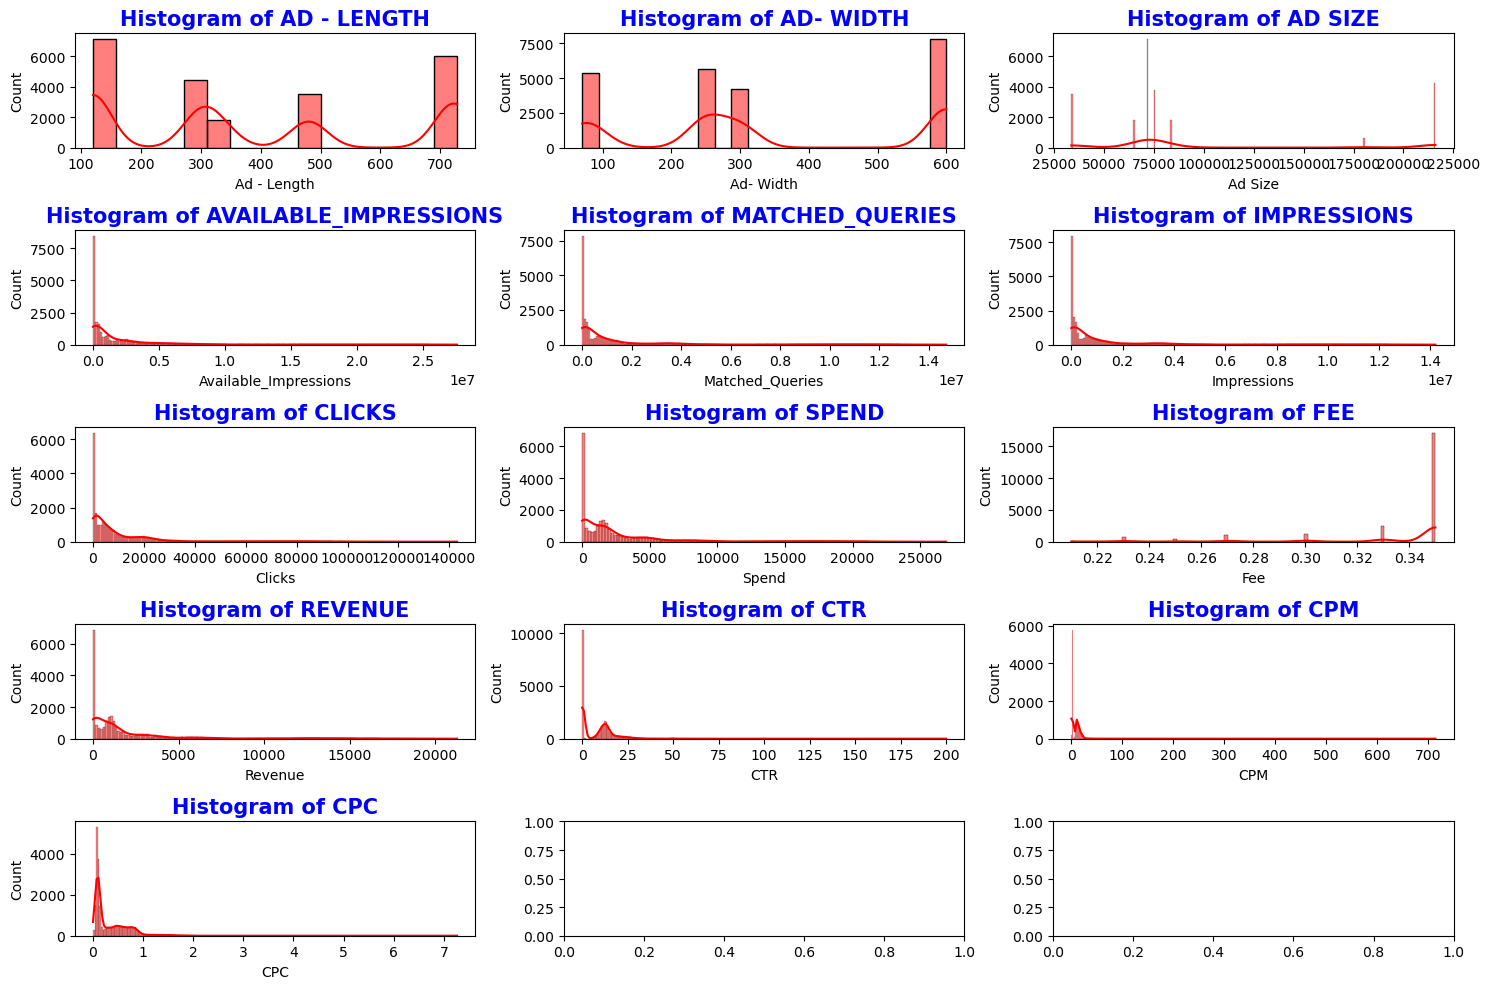

In [22]:
fig,axes = plt.subplots(5,3,figsize=(15,10))
for i,ax in zip(num,axes.flatten()):
    sns.histplot(x = data[i],ax=ax,color='r',kde=True)
    ax.set_title(f"Histogram of {i.upper()}",fontsize=15,weight='bold',color="Blue")
    plt.tight_layout()

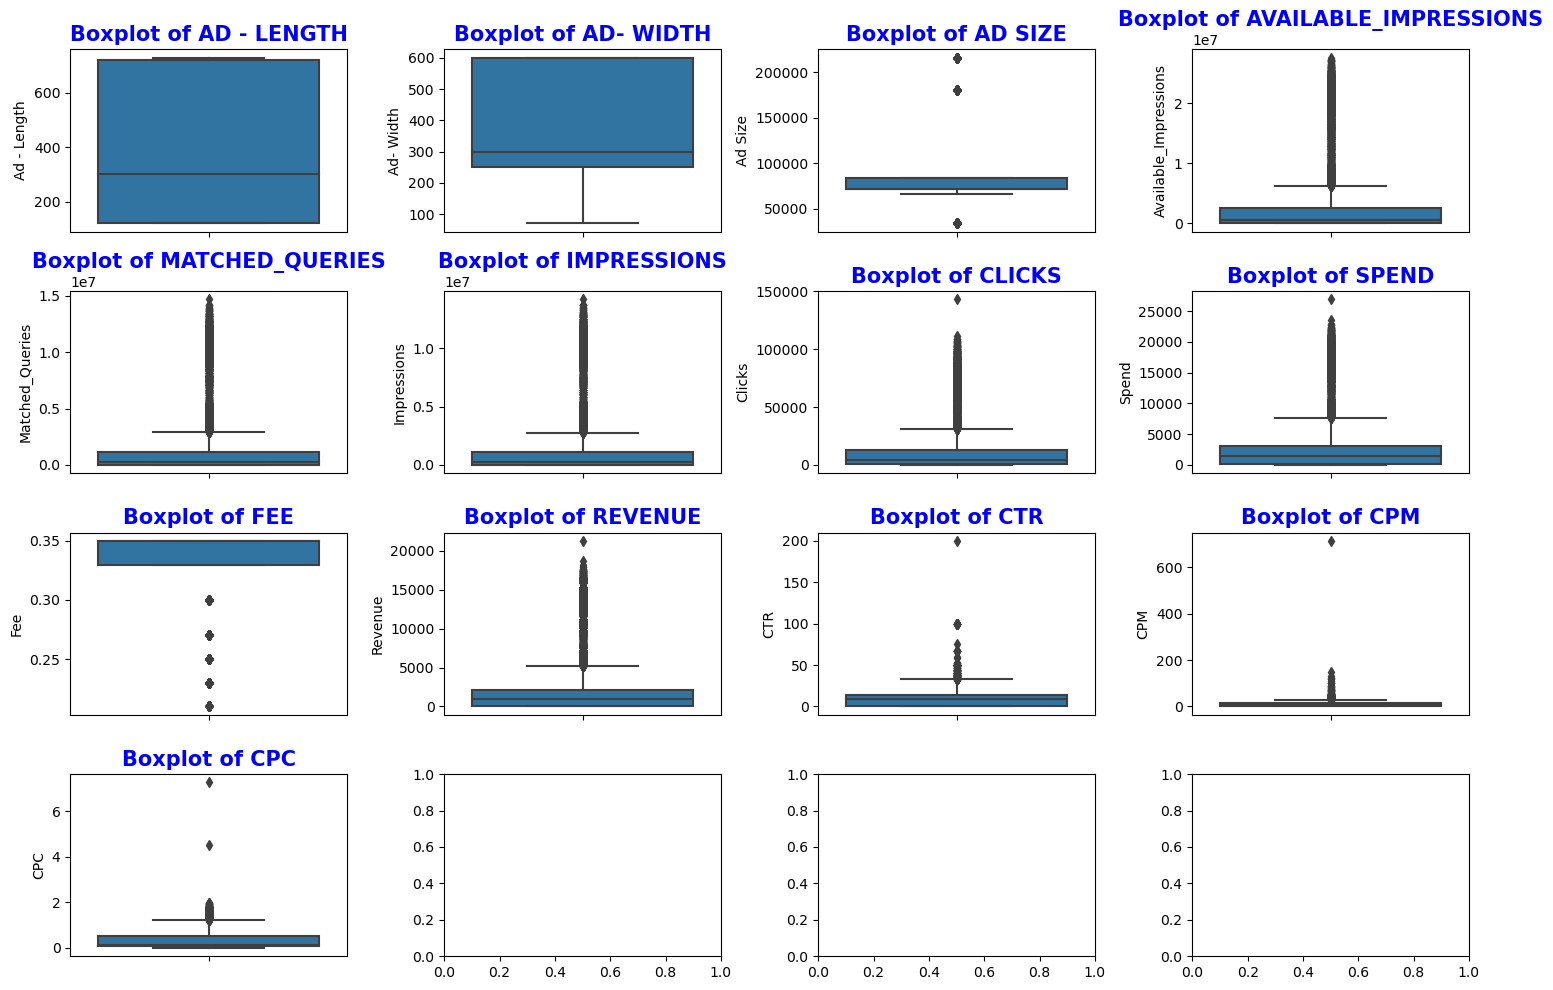

In [23]:
fig,axes = plt.subplots(4,4,figsize=(15,10))
for i,ax in zip(num,axes.flatten()):
    sns.boxplot(y = data[i],ax=ax)
    ax.set_title(f"Boxplot of {i.upper()}",fontsize=15,weight='bold',color="Blue")
    plt.tight_layout()

<font color = "blue">
<font size = 5>
Part 1 - Clustering: Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).

### Yes there are outlier in the data from the above boxplots. Treating outliers is a necessary step for K-Means clustering as it influences the cluster. The most used and efficient method is using InterQuartile range for Lower and Upper range.

In [24]:
def outliers(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    IQR_L = Q3-(1.5 * IQR)
    IQR_U = Q3+(1.5 * IQR)
    return IQR_L,IQR_U

In [25]:
for i in num:
    LL,UL = outliers(data[i])
    data[i] = np.where(data[i]<LL,LL,data[i])
    data[i] = np.where(data[i]>UL,UL,data[i])

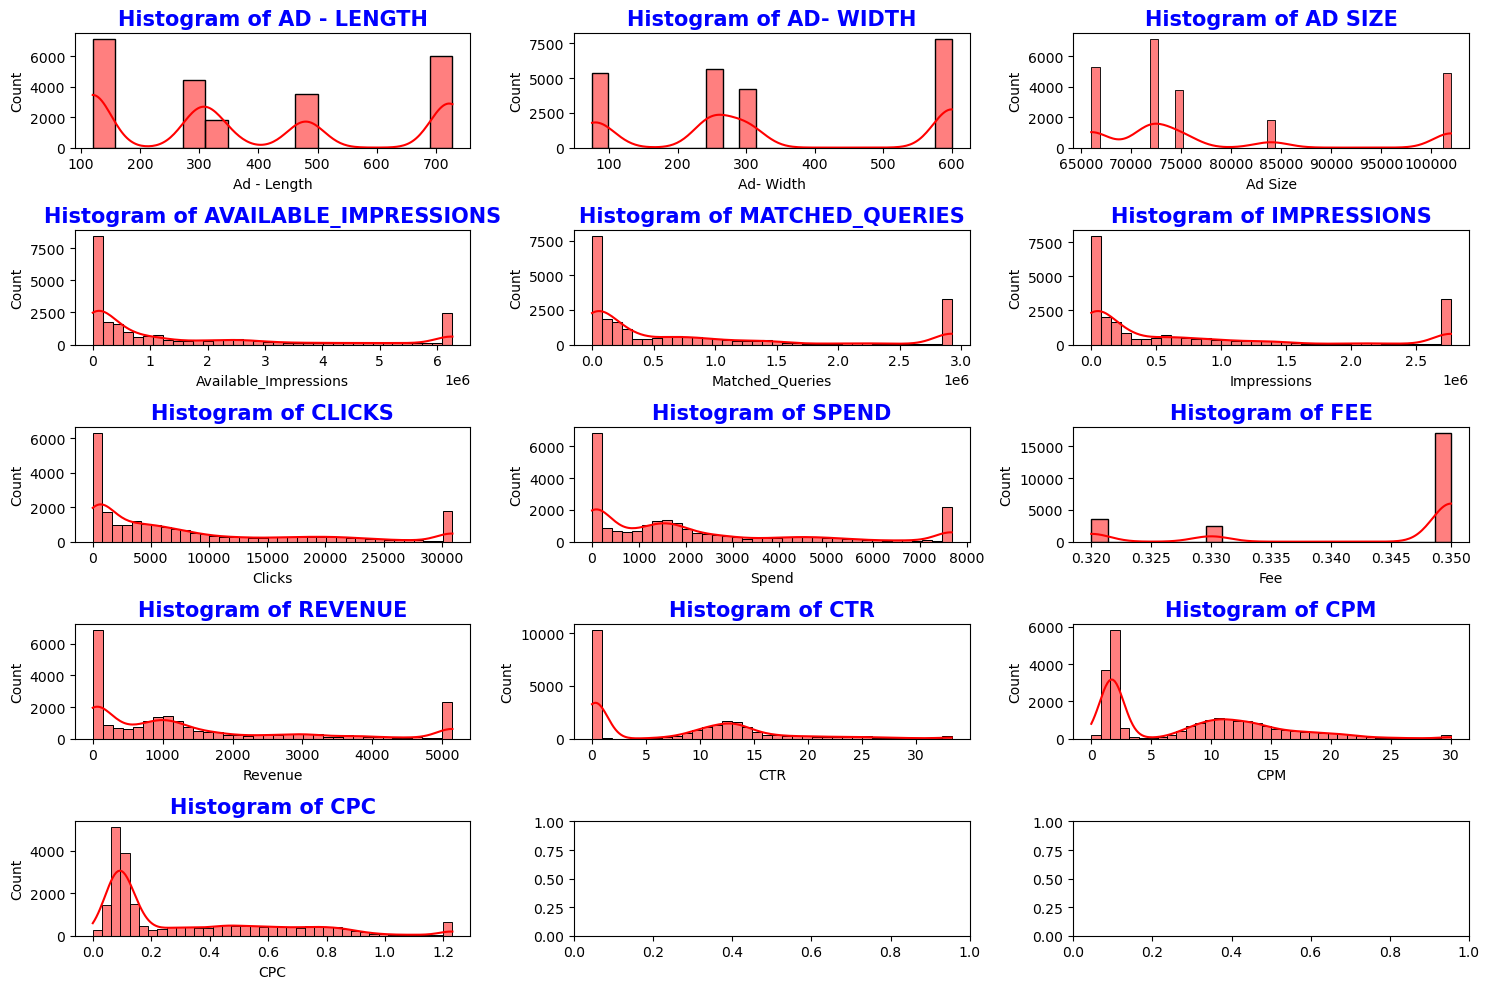

In [26]:
fig,axes = plt.subplots(5,3,figsize=(15,10))
for i,ax in zip(num,axes.flatten()):
    sns.histplot(x = data[i],ax=ax,color='r',kde=True)
    ax.set_title(f"Histogram of {i.upper()}",fontsize=15,weight='bold',color="Blue")
    plt.tight_layout()

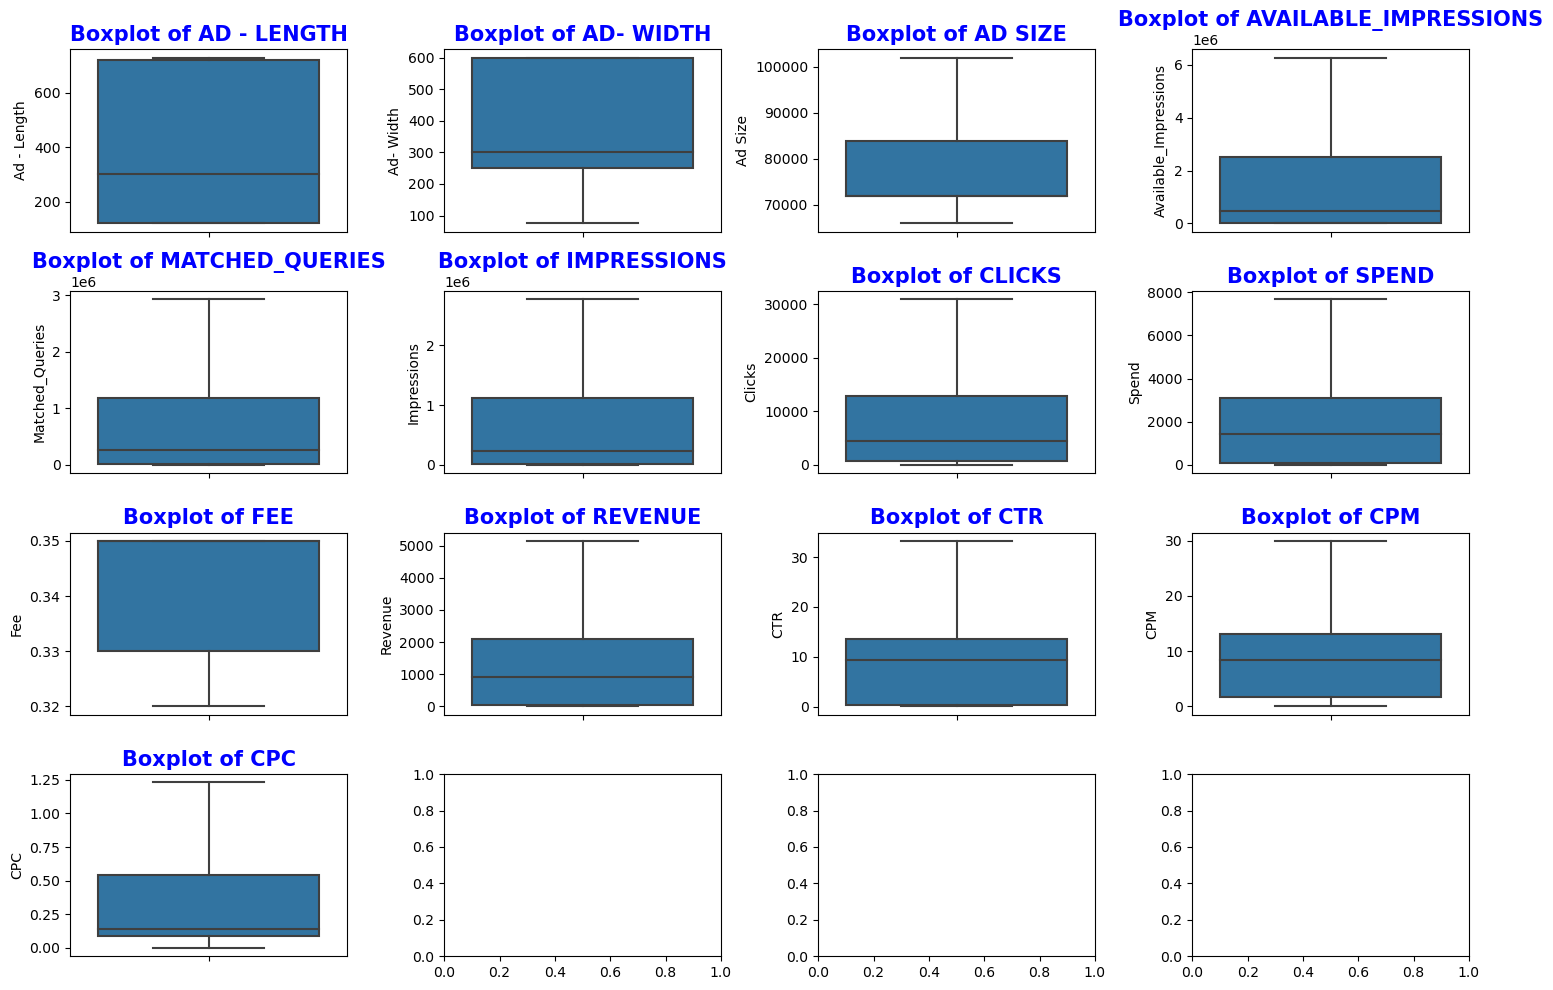

In [27]:
fig,axes = plt.subplots(4,4,figsize=(15,10))
for i,ax in zip(num,axes.flatten()):
    sns.boxplot(y = data[i],ax=ax)
    ax.set_title(f"Boxplot of {i.upper()}",fontsize=15,weight='bold',color="Blue")
    plt.tight_layout()

In [28]:
data.head()

,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,Format1,300.0,250.0,75000.0,Inter222,Video,Desktop,Display,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,0.309598,0.0,0.0
1,Format1,300.0,250.0,75000.0,Inter227,App,Mobile,Video,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,0.350877,0.0,0.0
2,Format1,300.0,250.0,75000.0,Inter222,Video,Desktop,Display,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,0.281690,0.0,0.0
3,Format1,300.0,250.0,75000.0,Inter228,Video,Mobile,Video,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,0.202020,0.0,0.0
4,Format1,300.0,250.0,75000.0,Inter217,Web,Desktop,Video,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,0.413223,0.0,0.0


In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.000000,120.000000,300.000000,7.200000e+02,7.280000e+02
Ad- Width,23066.0,3.386634e+02,2.020861e+02,75.000000,250.000000,300.000000,6.000000e+02,6.000000e+02
Ad Size,23066.0,7.845574e+04,1.308390e+04,66000.000000,72000.000000,72000.000000,8.400000e+04,1.020000e+05
Available_Impressions,23066.0,1.607253e+06,2.125528e+06,1.000000,33672.250000,483771.000000,2.527712e+06,6.268771e+06
Matched_Queries,23066.0,7.995380e+05,1.026037e+06,1.000000,18282.500000,258087.500000,1.180700e+06,2.924326e+06
Impressions,23066.0,7.536120e+05,9.802568e+05,1.000000,7990.500000,225290.000000,1.112428e+06,2.769086e+06
Clicks,23066.0,8.306828e+03,9.574779e+03,1.000000,710.000000,4425.000000,1.279375e+04,3.091938e+04
Spend,23066.0,2.166060e+03,2.425190e+03,0.000000,85.180000,1425.125000,3.121400e+03,7.675730e+03
Fee,23066.0,3.433378e-01,1.160205e-02,0.320000,0.330000,0.350000,3.500000e-01,3.500000e-01
Revenue,23066.0,1.449389e+03,1.646894e+03,0.000000,55.365375,926.335000,2.091338e+03,5.145297e+03


In [30]:
dummies=pd.get_dummies(data[["InventoryType","Ad Type","Platform","Device Type","Format"]], 
                       columns=["InventoryType","Ad Type","Platform","Device Type","Format"], 
                                     prefix=["InventoryType","Ad Type","Platform","Device Type","Format"],
        drop_first=True)
dummies

,InventoryType_Format2,InventoryType_Format3,InventoryType_Format4,InventoryType_Format5,InventoryType_Format6,InventoryType_Format7,Ad Type_Inter218,Ad Type_Inter219,Ad Type_Inter220,Ad Type_Inter221,...,Ad Type_Inter225,Ad Type_Inter226,Ad Type_Inter227,Ad Type_Inter228,Ad Type_Inter229,Ad Type_inter230,Platform_Video,Platform_Web,Device Type_Mobile,Format_Video
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
23062,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
23063,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
23064,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1


In [31]:
data_noncat = data.drop(cats,axis=1)

In [32]:
data_noncat.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300.0,250.0,75000.0,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,0.309598,0.0,0.0
1,300.0,250.0,75000.0,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,0.350877,0.0,0.0
2,300.0,250.0,75000.0,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,0.281690,0.0,0.0
3,300.0,250.0,75000.0,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,0.202020,0.0,0.0
4,300.0,250.0,75000.0,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,0.413223,0.0,0.0


In [33]:
data2 = pd.concat([data_noncat, dummies], axis=1)

In [34]:
data2.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,...,Ad Type_Inter225,Ad Type_Inter226,Ad Type_Inter227,Ad Type_Inter228,Ad Type_Inter229,Ad Type_inter230,Platform_Video,Platform_Web,Device Type_Mobile,Format_Video
0,300.0,250.0,75000.0,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,...,0,0,0,0,0,0,1,0,0,0
1,300.0,250.0,75000.0,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,...,0,0,1,0,0,0,0,0,1,1
2,300.0,250.0,75000.0,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,...,0,0,0,0,0,0,1,0,0,0
3,300.0,250.0,75000.0,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,...,0,0,0,1,0,0,1,0,1,1
4,300.0,250.0,75000.0,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,...,0,0,0,0,0,0,0,1,0,1


In [35]:
data2.shape

(23066, 36)

In [36]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.000000,120.000000,300.000000,7.200000e+02,7.280000e+02
Ad- Width,23066.0,3.386634e+02,2.020861e+02,75.000000,250.000000,300.000000,6.000000e+02,6.000000e+02
Ad Size,23066.0,7.845574e+04,1.308390e+04,66000.000000,72000.000000,72000.000000,8.400000e+04,1.020000e+05
Available_Impressions,23066.0,1.607253e+06,2.125528e+06,1.000000,33672.250000,483771.000000,2.527712e+06,6.268771e+06
Matched_Queries,23066.0,7.995380e+05,1.026037e+06,1.000000,18282.500000,258087.500000,1.180700e+06,2.924326e+06
Impressions,23066.0,7.536120e+05,9.802568e+05,1.000000,7990.500000,225290.000000,1.112428e+06,2.769086e+06
Clicks,23066.0,8.306828e+03,9.574779e+03,1.000000,710.000000,4425.000000,1.279375e+04,3.091938e+04
Spend,23066.0,2.166060e+03,2.425190e+03,0.000000,85.180000,1425.125000,3.121400e+03,7.675730e+03
Fee,23066.0,3.433378e-01,1.160205e-02,0.320000,0.330000,0.350000,3.500000e-01,3.500000e-01
Revenue,23066.0,1.449389e+03,1.646894e+03,0.000000,55.365375,926.335000,2.091338e+03,5.145297e+03


In [37]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ad - Length            23066 non-null  float64
 1   Ad- Width              23066 non-null  float64
 2   Ad Size                23066 non-null  float64
 3   Available_Impressions  23066 non-null  float64
 4   Matched_Queries        23066 non-null  float64
 5   Impressions            23066 non-null  float64
 6   Clicks                 23066 non-null  float64
 7   Spend                  23066 non-null  float64
 8   Fee                    23066 non-null  float64
 9   Revenue                23066 non-null  float64
 10  CTR                    23066 non-null  float64
 11  CPM                    23066 non-null  float64
 12  CPC                    23066 non-null  float64
 13  InventoryType_Format2  23066 non-null  uint8  
 14  InventoryType_Format3  23066 non-null  uint8  
 15  In

<font color = "blue">
<font size = 5>
Part 1 - Clustering: Perform z-score scaling and discuss how it affects the speed of the algorithm.

In [38]:
from sklearn.preprocessing import StandardScaler
data_scaled = pd.DataFrame(StandardScaler().fit_transform(data2),columns=data2.columns)

In [39]:
data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,1.281478e-16,1.000022,-1.134891,-1.134891,-0.364496,1.433093,1.467332
Ad- Width,23066.0,-9.857525e-18,1.000022,-1.304736,-0.438750,-0.191326,1.293222,1.293222
Ad Size,23066.0,2.217943e-16,1.000022,-0.952010,-0.493421,-0.493421,0.423756,1.799523
Available_Impressions,23066.0,9.857525e-18,1.000022,-0.756182,-0.740341,-0.528577,0.433059,2.193158
Matched_Queries,23066.0,1.971505e-17,1.000022,-0.779265,-0.761447,-0.527722,0.371498,2.070914
Impressions,23066.0,0.000000e+00,1.000022,-0.768806,-0.760655,-0.538975,0.366051,2.056111
Clicks,23066.0,-1.182903e-16,1.000022,-0.867488,-0.793438,-0.405431,0.468629,2.361729
Spend,23066.0,-9.857525e-17,1.000022,-0.893170,-0.858046,-0.305523,0.393932,2.271900
Fee,23066.0,-5.914515e-16,1.000022,-2.011569,-1.149634,0.574238,0.574238,0.574238
Revenue,23066.0,3.943010e-17,1.000022,-0.880093,-0.846474,-0.317607,0.389803,2.244218


<font color = "blue">
<font size = 5>
Part 1 - Clustering: Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

In [40]:
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

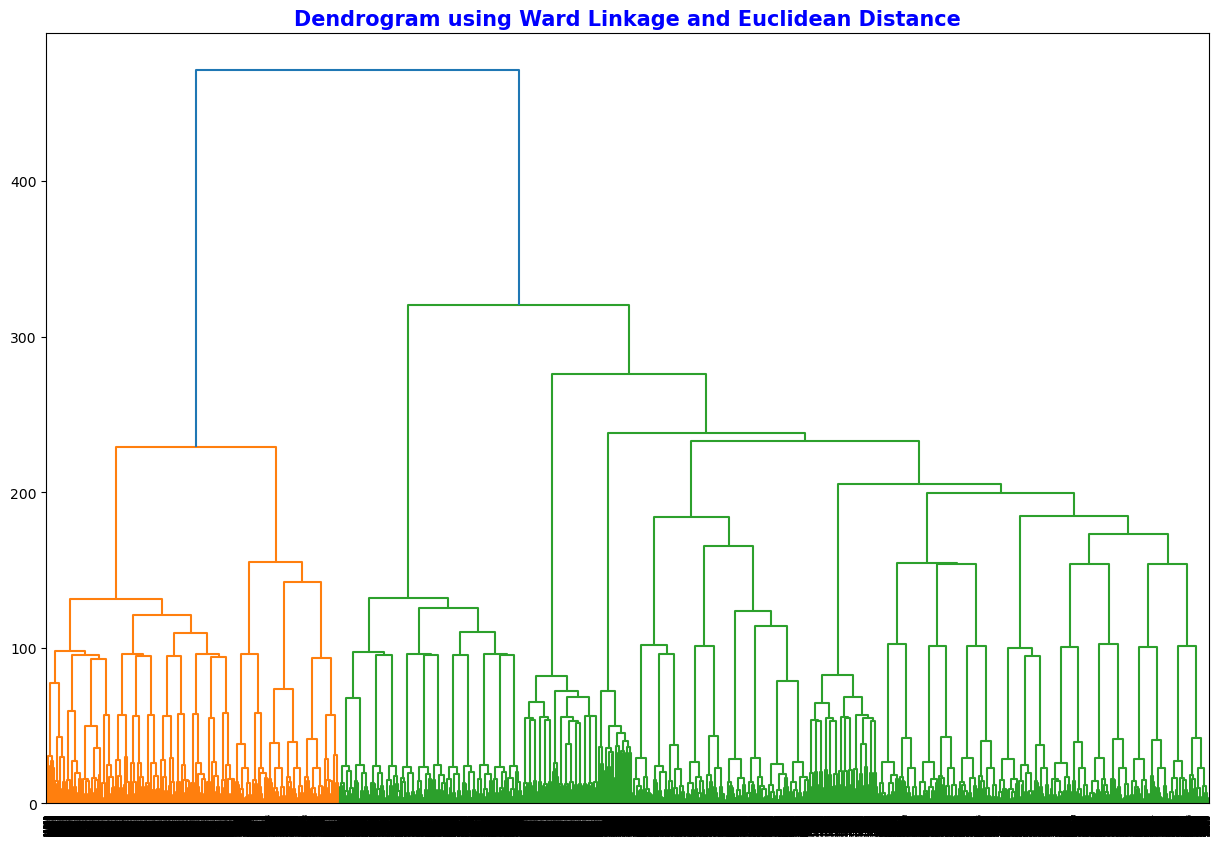

In [41]:
labellist = data_scaled.index
wardlink = linkage(data_scaled,method="ward",metric="euclidean")
fig,axes = plt.subplots(figsize=(15,10))
dendrogram(wardlink,labels = labellist)
plt.title("Dendrogram using Ward Linkage and Euclidean Distance",fontsize=15,weight='bold',color="Blue")
plt.show()

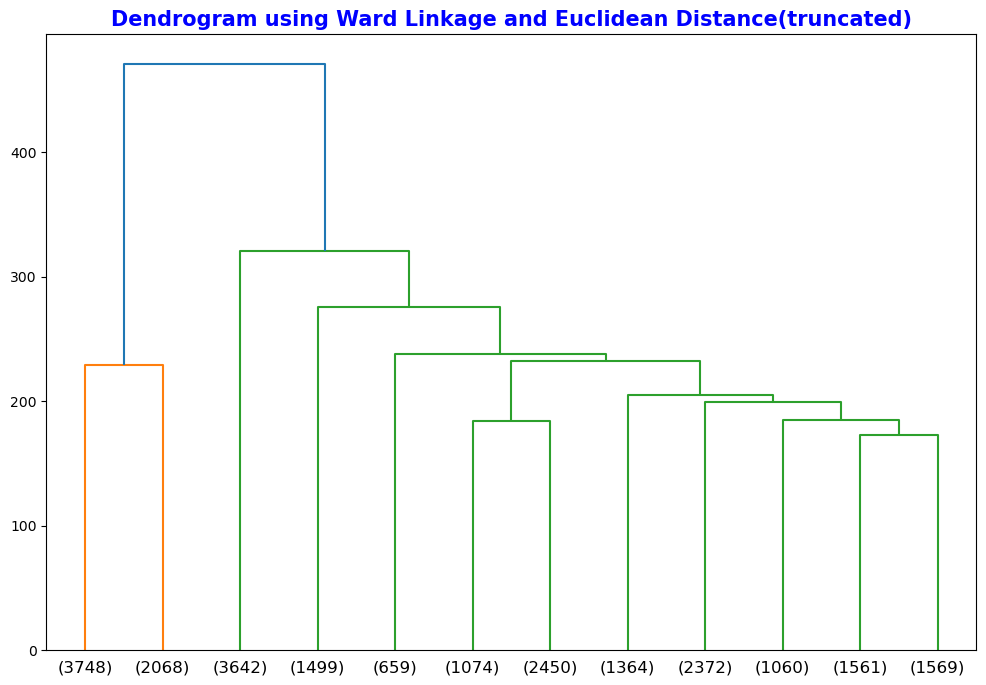

In [42]:
fig,axes = plt.subplots(figsize=(12,8))
dendrogram(wardlink,labels = labellist,p = 12,truncate_mode='lastp')
plt.title("Dendrogram using Ward Linkage and Euclidean Distance(truncated)",fontsize=15,weight='bold',color="Blue")
plt.show()

<font color = "blue">
<font size = 5>
Part 1 - Clustering: Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

In [43]:
from sklearn.cluster import KMeans
wss = []
for i in range(1,11):
    k_means = KMeans(n_clusters = i,random_state=123)
    k_means.fit(data_scaled)
    wss.append(k_means.inertia_)
wss_df = pd.DataFrame(wss,columns = ['WSS'])
wss_df['Num_of_clusters'] = range(1,11)
wss_df = wss_df[['Num_of_clusters','WSS']]
wss_df['diff'] = wss_df['WSS'].diff()
wss_df

,Num_of_clusters,WSS,diff
0,1,830376.000000,NaN
1,2,695004.981503,-135371.018497
2,3,626983.768411,-68021.213091
3,4,565851.689521,-61132.078890
4,5,530418.983545,-35432.705976
5,6,506446.041664,-23972.941882
6,7,490590.120211,-15855.921453
7,8,466912.266050,-23677.854161
8,9,455951.281029,-10960.985021
9,10,439558.482662,-16392.798367


Text(0.5, 1.0, 'Elbow Plot for K-Means')

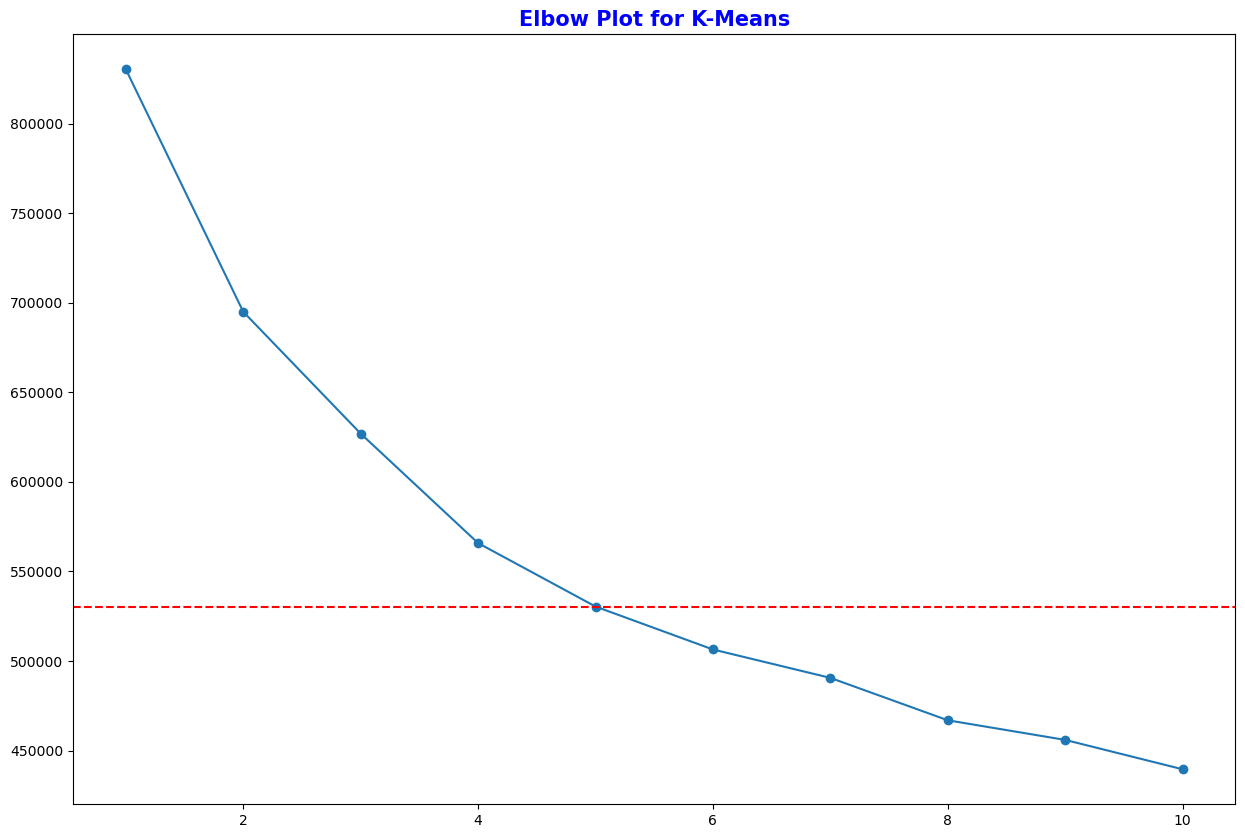

In [44]:
fig,axes = plt.subplots(figsize=(15,10))
plt.plot(wss_df['Num_of_clusters'],wss_df['WSS'],marker='o')
axes.axhline(530418.983545,linestyle = '--',color = 'red')
plt.title("Elbow Plot for K-Means",fontsize=15,weight='bold',color="Blue")

## The Elbow is formed at 5

<font color = "blue">
<font size = 5>
Part 1 - Clustering: Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

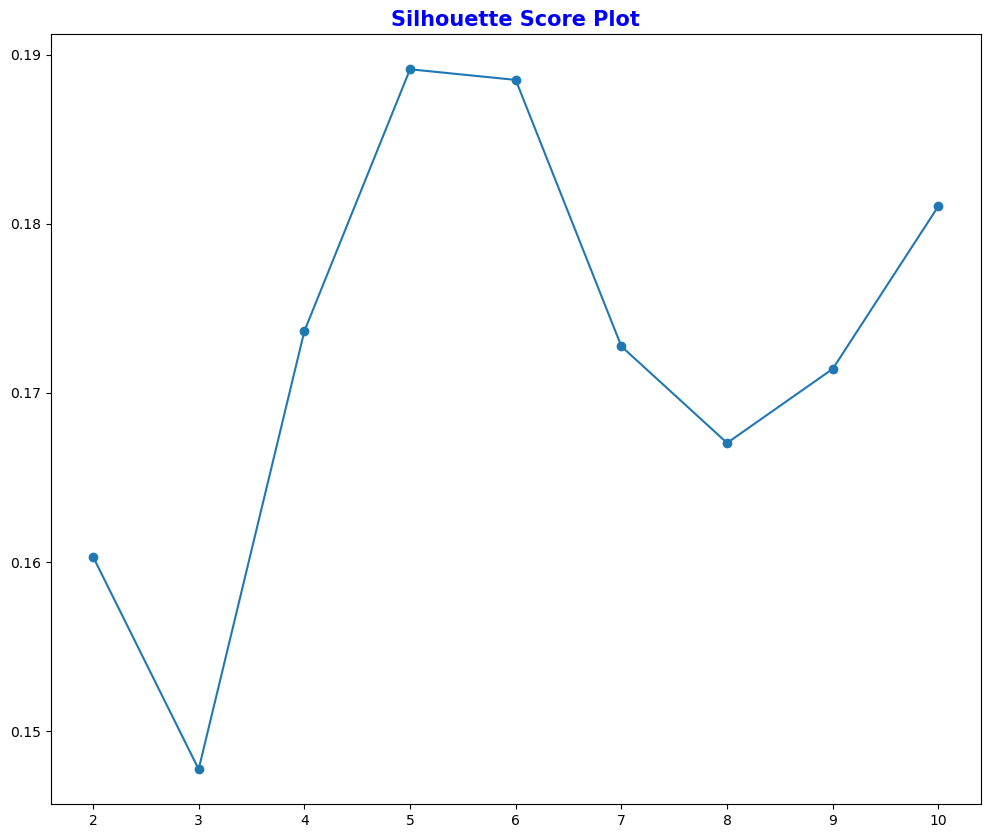

In [45]:
from sklearn.metrics import silhouette_score
sil_score = []
for i in range(2,11):
    k_means = KMeans(n_clusters = i,random_state=123)
    k_means.fit(data_scaled)
    clus = k_means.labels_
    sil_score.append(silhouette_score(X=data_scaled,labels = clus))
fig,axes = plt.subplots(figsize=(12,10))
plt.plot(range(2,11),sil_score,marker='o')
axes.set_title('Silhouette Score Plot',fontsize=15,weight='bold',color="Blue");

## The Silhouette Score also confirms that the optimum no of clusters is 5.

In [46]:
sil_score_df = pd.DataFrame(sil_score,columns = ['silhouette_score'])
sil_score_df['Num_of_clusters'] = range(2,11)
sil_score_df = sil_score_df[['Num_of_clusters','silhouette_score']]
sil_score_df

,Num_of_clusters,silhouette_score
0,2,0.160321
1,3,0.147746
2,4,0.173651
3,5,0.189136
4,6,0.188508
5,7,0.172752
6,8,0.167041
7,9,0.171424
8,10,0.181049


<font color = "blue">
<font size = 5>
Part 1 - Clustering: Profile the ads based on optimum number of clusters using silhouette score and your domain understanding 

In [47]:
k_means_model = KMeans(n_clusters=5,random_state=123)
k_means_model.fit(data_scaled)
clus = k_means_model.labels_
data['Cluster'] = clus
data['Cluster'] = data['Cluster'].map({0:'Cluster-1',1:'Cluster-2',2:'Cluster-3',3:'Cluster-4',4:'Cluster-5'})
data.head()

,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Cluster
0,Format1,300.0,250.0,75000.0,Inter222,Video,Desktop,Display,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,0.309598,0.0,0.0,Cluster-5
1,Format1,300.0,250.0,75000.0,Inter227,App,Mobile,Video,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,0.350877,0.0,0.0,Cluster-5
2,Format1,300.0,250.0,75000.0,Inter222,Video,Desktop,Display,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,0.281690,0.0,0.0,Cluster-5
3,Format1,300.0,250.0,75000.0,Inter228,Video,Mobile,Video,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,0.202020,0.0,0.0,Cluster-5
4,Format1,300.0,250.0,75000.0,Inter217,Web,Desktop,Video,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,0.413223,0.0,0.0,Cluster-5


In [48]:
clus

array([4, 4, 4, ..., 1, 0, 1])

In [49]:
data.tail()

,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Cluster
23061,Format5,720.0,300.0,102000.0,Inter220,Web,Mobile,Video,1.0,1.0,1.0,1.0,0.07,0.35,0.0455,33.278766,29.981418,0.07,Cluster-2
23062,Format5,720.0,300.0,102000.0,Inter224,Web,Desktop,Video,3.0,2.0,2.0,1.0,0.04,0.35,0.0260,33.278766,20.000000,0.04,Cluster-2
23063,Format5,720.0,300.0,102000.0,Inter218,App,Mobile,Video,2.0,1.0,1.0,1.0,0.05,0.35,0.0325,33.278766,29.981418,0.05,Cluster-2
23064,Format4,120.0,600.0,72000.0,inter230,Video,Mobile,Video,7.0,1.0,1.0,1.0,0.07,0.35,0.0455,33.278766,29.981418,0.07,Cluster-1
23065,Format5,720.0,300.0,102000.0,Inter221,App,Mobile,Video,2.0,2.0,2.0,1.0,0.09,0.35,0.0585,33.278766,29.981418,0.09,Cluster-2


In [50]:
data["Revenue"].sum()

33431596.795962498

In [51]:
round(pd.pivot_table(data,index="Cluster",values="Revenue",aggfunc=(np.sum,np.mean)),2)

,mean,sum
Cluster,,
Cluster-1,188.25,1303041.07
Cluster-2,790.67,3361941.69
Cluster-3,3719.97,16393920.78
Cluster-4,4451.06,6903595.33
Cluster-5,921.65,5469097.93


In [52]:
round(pd.pivot_table(data,index="Cluster",values="Clicks",aggfunc=(np.sum,np.mean)),2)

,mean,sum
Cluster,,
Cluster-1,2854.08,19755922.00
Cluster-2,13744.09,58439887.88
Cluster-3,10585.49,46650271.00
Cluster-4,30506.55,47315658.25
Cluster-5,3276.64,19443560.00


In [53]:
round(pd.pivot_table(data,index="Cluster",values="Spend",aggfunc=(np.sum,np.mean)),2)

,mean,sum
Cluster,,
Cluster-1,289.61,2004679.35
Cluster-2,1214.05,5162124.83
Cluster-3,5509.45,24280152.77
Cluster-4,6516.56,10107179.88
Cluster-5,1416.95,8408205.39


In [54]:
round(pd.pivot_table(data,index="Cluster",values="Fee",aggfunc=(np.sum,np.mean)),2)

,mean,sum
Cluster,,
Cluster-1,0.35,2422.70
Cluster-2,0.35,1486.26
Cluster-3,0.33,1435.45
Cluster-4,0.32,499.32
Cluster-5,0.35,2075.70


In [55]:
pd.pivot_table(data,index="Cluster",columns="Platform",values="Revenue",aggfunc="count")

Platform,App,Video,Web
Cluster,,,
Cluster-1,1463,2961,2498
Cluster-2,913,1813,1526
Cluster-3,935,1900,1572
Cluster-4,340,666,545
Cluster-5,1291,2533,2110


In [56]:
pd.pivot_table(data,index="Cluster",columns="Device Type",values="Revenue",aggfunc="count")

Device Type,Desktop,Mobile
Cluster,,
Cluster-1,2476,4446
Cluster-2,1523,2729
Cluster-3,1596,2811
Cluster-4,562,989
Cluster-5,2103,3831


In [57]:
pd.pivot_table(data,index="Cluster",columns="Format",values="Revenue",aggfunc="count")

Format,Display,Video
Cluster,,
Cluster-1,3483,3439
Cluster-2,2083,2169
Cluster-3,2218,2189
Cluster-4,791,760
Cluster-5,2939,2995


In [58]:
pd.pivot_table(data,index="Cluster",columns="Ad Type",values="Revenue",aggfunc="count")

Ad Type,Inter217,Inter218,Inter219,Inter220,Inter221,Inter222,Inter223,Inter224,Inter225,Inter226,Inter227,Inter228,Inter229,inter230
Cluster,,,,,,,,,,,,,,
Cluster-1,496,486,505,512,491,499,494,503,505,493,486,484,473,495
Cluster-2,308,305,301,305,309,304,307,306,300,300,299,302,304,302
Cluster-3,323,313,322,305,307,311,316,319,313,309,315,311,321,322
Cluster-4,122,112,108,97,114,101,101,113,107,112,114,119,118,113
Cluster-5,406,429,414,425,429,434,436,417,418,426,433,423,432,412


In [59]:
pd.pivot_table(data,index="Cluster",columns="InventoryType",values="Revenue",aggfunc="count").fillna(0)

InventoryType,Format1,Format2,Format3,Format4,Format5,Format6,Format7
Cluster,,,,,,,
Cluster-1,1.0,0.0,0.0,5784.0,0.0,827.0,310.0
Cluster-2,0.0,0.0,0.0,0.0,4249.0,0.0,3.0
Cluster-3,2193.0,1717.0,0.0,0.0,0.0,375.0,122.0
Cluster-4,0.0,0.0,0.0,1381.0,0.0,130.0,40.0
Cluster-5,1620.0,72.0,3540.0,0.0,0.0,518.0,184.0


In [60]:
round(pd.pivot_table(data,index="Cluster",values="CTR",aggfunc=(np.sum,np.mean)),2)

,mean,sum
Cluster,,
Cluster-1,15.63,108189.07
Cluster-2,13.34,56737.44
Cluster-3,0.21,946.16
Cluster-4,13.75,21320.86
Cluster-5,0.42,2482.87


In [61]:
round(pd.pivot_table(data,index="Cluster",values="CPM",aggfunc=(np.sum,np.mean)),2)

,mean,sum
Cluster,,
Cluster-1,14.18,98159.23
Cluster-2,11.73,49892.51
Cluster-3,1.60,7029.66
Cluster-4,15.42,23910.07
Cluster-5,1.78,10592.15


In [62]:
round(pd.pivot_table(data,index="Cluster",values="CPC",aggfunc=(np.sum,np.mean)),2)

,mean,sum
Cluster,,
Cluster-1,0.10,704.16
Cluster-2,0.09,383.89
Cluster-3,0.77,3385.95
Cluster-4,0.11,174.02
Cluster-5,0.50,2964.56


In [63]:
round(pd.pivot_table(data,index="Cluster",values="InventoryType",margins=True,aggfunc="count")/len(data)*100,2)

,InventoryType
Cluster,
Cluster-1,30.01
Cluster-2,18.43
Cluster-3,19.11
Cluster-4,6.72
Cluster-5,25.73
All,100.00


In [64]:
round(pd.pivot_table(data,index=["Cluster","Device Type"],columns="Format",values="Revenue",margins=True,aggfunc="count")/len(data)*100,2)

Format                 Display  Video     All
Cluster   Device Type                        
Cluster-1 Desktop         5.27   5.47   10.73
          Mobile          9.83   9.44   19.28
Cluster-2 Desktop         3.26   3.34    6.60
          Mobile          5.77   6.07   11.83
Cluster-3 Desktop         3.46   3.46    6.92
          Mobile          6.15   6.03   12.19
Cluster-4 Desktop         1.28   1.15    2.44
          Mobile          2.15   2.14    4.29
Cluster-5 Desktop         4.56   4.56    9.12
          Mobile          8.19   8.42   16.61
All                      49.92  50.08  100.00

In [65]:
round(pd.pivot_table(data,index=["Cluster","Device Type"],columns=["Platform","Format"],values="Revenue",margins=True,aggfunc="count")/len(data)*100,2).fillna(0)

Platform                  App          Video            Web            All
Format                Display  Video Display  Video Display  Video        
Cluster   Device Type                                                     
Cluster-1 Desktop        0.00   0.00    3.11   3.29    2.16   2.17   10.73
          Mobile         3.29   3.06    3.32   3.12    3.23   3.27   19.28
Cluster-2 Desktop        0.00   0.00    1.96   1.98    1.30   1.36    6.60
          Mobile         2.03   1.93    1.88   2.04    1.86   2.09   11.83
Cluster-3 Desktop        0.00   0.00    2.07   2.06    1.39   1.39    6.92
          Mobile         2.08   1.97    2.12   1.98    1.95   2.09   12.19
Cluster-4 Desktop        0.00   0.00    0.75   0.66    0.53   0.49    2.44
          Mobile         0.71   0.77    0.69   0.78    0.75   0.60    4.29
Cluster-5 Desktop        0.00   0.00    2.73   2.82    1.83   1.74    9.12
          Mobile         2.95   2.65    2.59   2.84    2.64   2.94   16.61
All                     11.05  10.37   21.23  21.57   17.64  18.13  100.00

In [66]:
round(pd.pivot_table(data,index=["Cluster","Device Type"],columns=["Platform","Format"],values="Revenue",margins=True,aggfunc="sum"),2).fillna(0)

Platform                      App                   Video              \
Format                    Display       Video     Display       Video   
Cluster   Device Type                                                   
Cluster-1 Desktop            0.00        0.00   141015.04   132513.31   
          Mobile        152210.15   134920.09   128300.86   148352.20   
Cluster-2 Desktop            0.00        0.00   355549.06   367425.28   
          Mobile        380301.03   339730.93   348965.29   366536.36   
Cluster-3 Desktop            0.00        0.00  1763520.22  1784148.09   
          Mobile       1788734.52  1692483.00  1808456.26  1709370.30   
Cluster-4 Desktop            0.00        0.00   779442.73   681213.37   
          Mobile        729480.34   788229.58   729986.27   792477.03   
Cluster-5 Desktop            0.00        0.00   587207.87   580989.12   
          Mobile        617018.37   558956.24   547778.48   614670.86   
All                    3667744.40  3514319.84  7190222.08  7177695.92   

Platform                      Web                      All  
Format                    Display       Video               
Cluster   Device Type                                       
Cluster-1 Desktop        93717.62    95078.85    462324.82  
          Mobile        154326.47   122606.49    840716.25  
Cluster-2 Desktop       246322.26   233941.37   1203237.98  
          Mobile        344375.96   378794.13   2158703.71  
Cluster-3 Desktop      1177927.84  1184219.56   5909815.72  
          Mobile       1704699.47  1780361.52  10484105.06  
Cluster-4 Desktop       538678.90   500900.66   2500235.66  
          Mobile        744713.80   618472.66   4403359.67  
Cluster-5 Desktop       397132.19   359597.26   1924926.44  
          Mobile        562556.56   643190.98   3544171.49  
All                    5964451.08  5917163.47  33431596.80

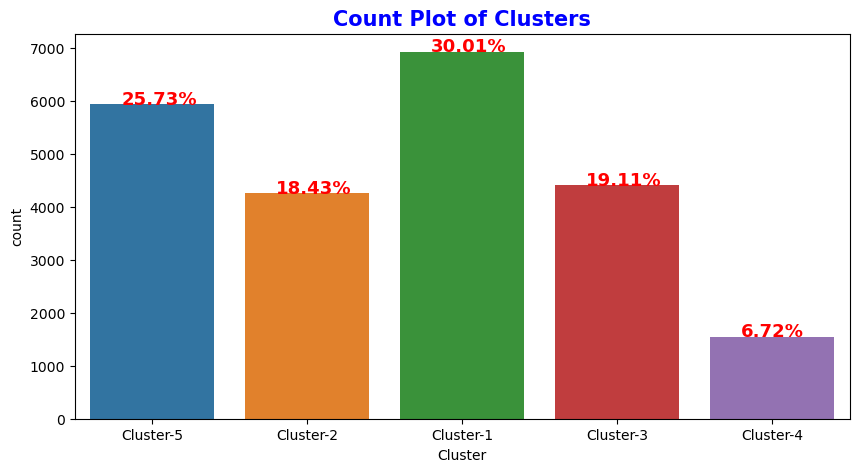

In [67]:
fig,axes = plt.subplots(figsize = (10,5))
sns.countplot(x = "Cluster",data = data)
plt.title("Count Plot of Clusters",fontsize=15,weight='bold',color="Blue")
for p in axes.patches:
    axes.annotate(text = f"{round(p.get_height()/len(data)*100,2)}%",xy = (p.get_x() + p.get_width() / 4, p.get_height()+4),fontsize=13,color="Red",weight='bold')
plt.show()

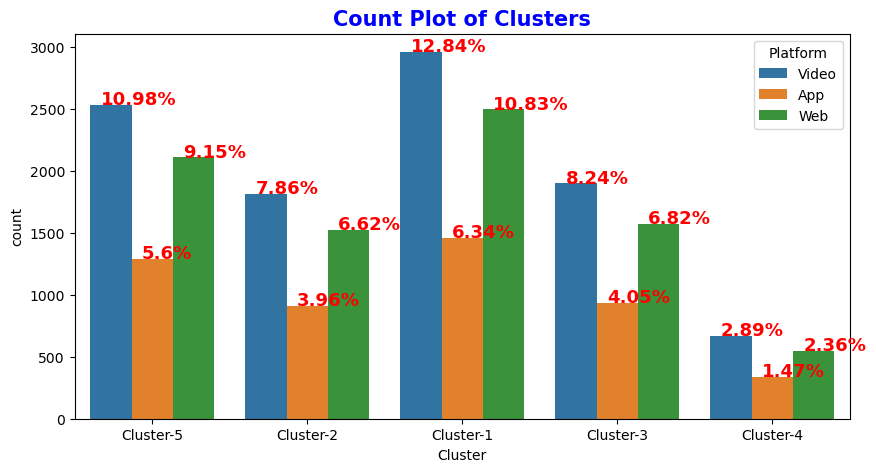

In [68]:
fig,axes = plt.subplots(figsize = (10,5))
sns.countplot(x = "Cluster",data = data,hue="Platform")
plt.title("Count Plot of Clusters",fontsize=15,weight='bold',color="Blue")
for p in axes.patches:
    axes.annotate(text = f"{round(p.get_height()/len(data)*100,2)}%",xy = (p.get_x() + p.get_width() / 4, p.get_height()+4),fontsize=13,color="Red",weight='bold')
plt.show()

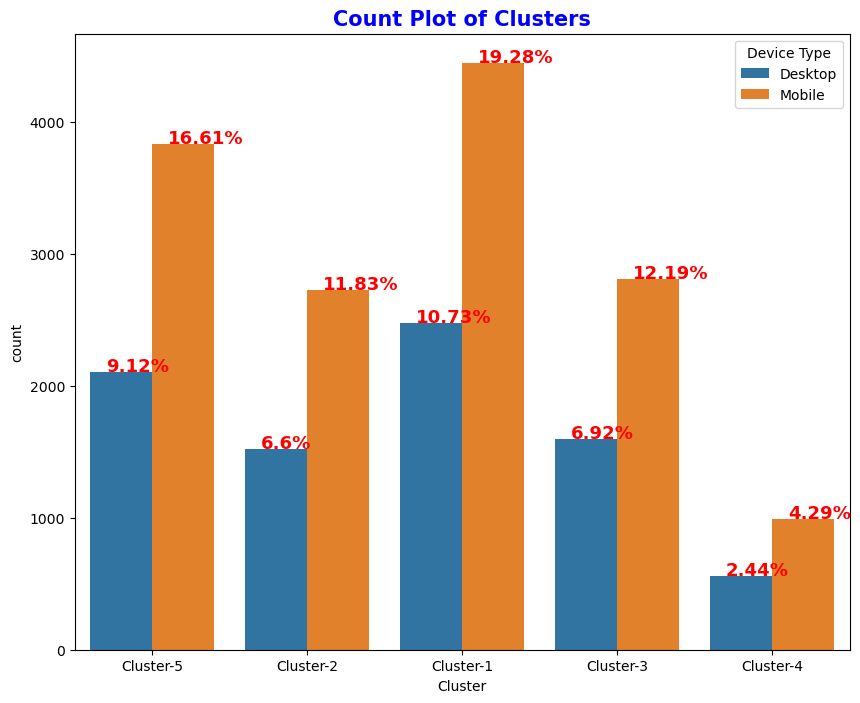

In [69]:
fig,axes = plt.subplots(figsize = (10,8))
sns.countplot(x = "Cluster",data = data,hue="Device Type")
plt.title("Count Plot of Clusters",fontsize=15,weight='bold',color="Blue")
for p in axes.patches:
    axes.annotate(text = f"{round(p.get_height()/len(data)*100,2)}%",xy = (p.get_x() + p.get_width() / 4, p.get_height()+4),fontsize=13,color="Red",weight='bold')
plt.show()

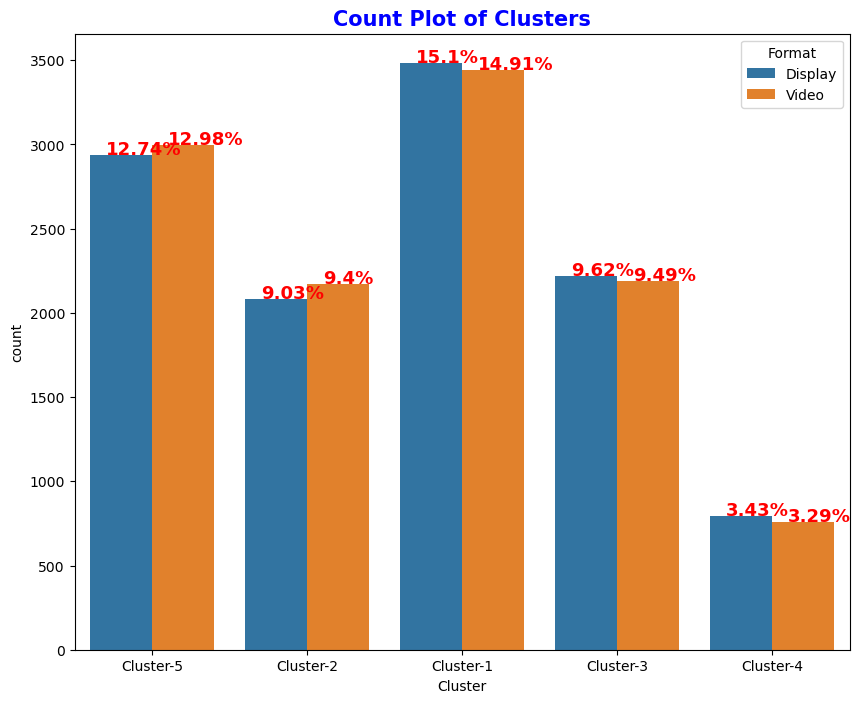

In [70]:
fig,axes = plt.subplots(figsize = (10,8))
sns.countplot(x = "Cluster",data = data,hue="Format")
plt.title("Count Plot of Clusters",fontsize=15,weight='bold',color="Blue")
for p in axes.patches:
    axes.annotate(text = f"{round(p.get_height()/len(data)*100,2)}%",xy = (p.get_x() + p.get_width() / 4, p.get_height()+4),fontsize=13,color="Red",weight='bold')
plt.show()

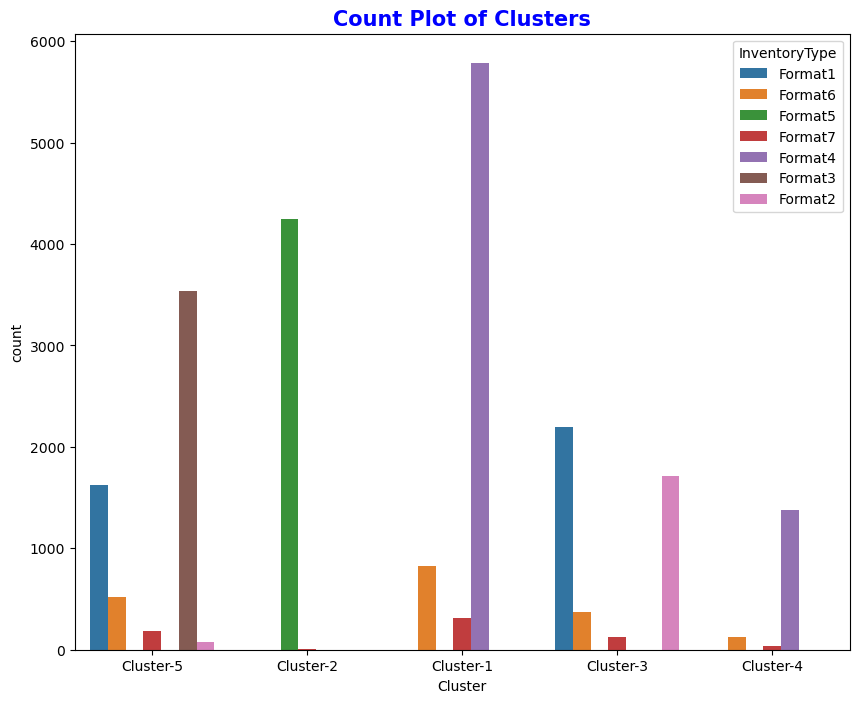

In [71]:
fig,axes = plt.subplots(figsize = (10,8))
sns.countplot(x = "Cluster",data = data,hue="InventoryType")
plt.title("Count Plot of Clusters",fontsize=15,weight='bold',color="Blue")
plt.show()

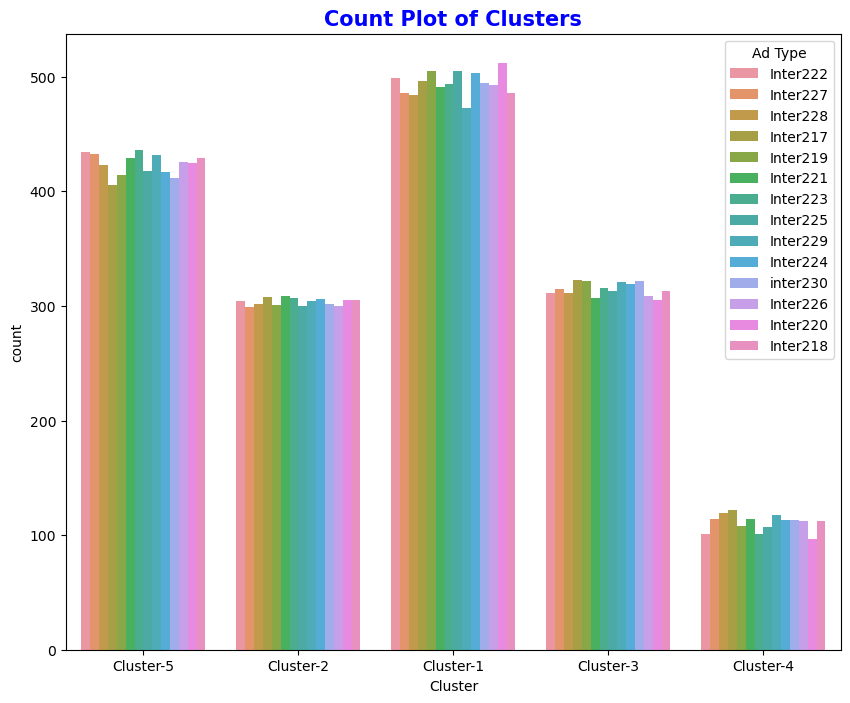

In [72]:
fig,axes = plt.subplots(figsize = (10,8))
sns.countplot(x = "Cluster",data = data,hue="Ad Type")
plt.title("Count Plot of Clusters",fontsize=15,weight='bold',color="Blue")
plt.show()

In [73]:
round(pd.pivot_table(data,index="Cluster",values="Ad - Length",aggfunc=(np.sum,np.mean)),2)

,mean,sum
Cluster,,
Cluster-1,153.89,1065252.0
Cluster-2,719.70,3060180.0
Cluster-3,469.82,2070476.0
Cluster-4,142.75,221400.0
Cluster-5,415.72,2466864.0


In [74]:
round(pd.pivot_table(data,index="Cluster",values="Ad- Width",aggfunc=(np.sum,np.mean)),2)

,mean,sum
Cluster,,
Cluster-1,558.13,3863400.0
Cluster-2,300.21,1276500.0
Cluster-3,197.35,869730.0
Cluster-4,570.66,885100.0
Cluster-5,154.51,916880.0


In [75]:
round(pd.pivot_table(data,index="Cluster",values="Ad Size",aggfunc=(np.sum,np.mean)),2)

,mean,sum
Cluster,,
Cluster-1,74777.67,517611000.0
Cluster-2,102000.00,433704000.0
Cluster-3,73006.81,321741000.0
Cluster-4,73779.50,114432000.0
Cluster-5,71144.59,422172000.0
